In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
df1 = pd.read_csv("/content/drive/MyDrive/tensorflow 3조/data/targetData/modelFeature_02.csv") # 요일 = 월:0 일:6
df1 = df1.iloc[:,1:]
df1

,날짜,읍면동,관광기후지수,평균기온,일강수량,최대풍속,월,요일,총방문자수,연도
0,2018-01-01,건입동,33.81,0.8,0.0,2.6,1,0,176759,2018
1,2018-01-02,건입동,57.30,1.0,0.0,1.5,1,1,154567,2018
2,2018-01-03,건입동,48.52,0.0,0.0,3.4,1,2,132826,2018
3,2018-01-04,건입동,29.42,-1.1,1.0,2.1,1,3,157389,2018
4,2018-01-05,건입동,21.54,-0.4,4.5,3.2,1,4,152996,2018
...,...,...,...,...,...,...,...,...,...,...
11675,2019-12-27,한림읍,-0.53,6.1,0.0,5.3,12,4,208737,2019
11676,2019-12-28,한림읍,-0.18,7.0,0.0,2.0,12,5,213487,2019
11677,2019-12-29,한림읍,-0.78,12.3,34.0,3.3,12,6,211347,2019
11678,2019-12-30,한림읍,-0.40,10.8,0.0,4.4,12,0,206446,2019


In [ ]:
df1['날짜'] = pd.to_datetime(df1['날짜'])
df1.dtypes

날짜        datetime64[ns]
읍면동               object
관광기후지수           float64
평균기온             float64
일강수량             float64
최대풍속             float64
월                  int64
요일                 int64
총방문자수              int64
연도                 int64
dtype: object

In [ ]:
import matplotlib.font_manager as fm
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
fm._rebuild()

In [ ]:
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")
print(sys_font)

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

sys_font number: 27
['/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-BoldItalic.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Italic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-BoldItalic.ttf', '/usr/share/fonts/truetype/nanum/NanumGothic.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Italic.ttf', '/usr/share/fonts/truetype/liberation/Libera

In [ ]:
nanum_font

['/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf']

In [ ]:
path = '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

NanumMyeongjo


In [ ]:
daily_tour = df1.groupby('날짜', as_index=False)['총방문자수'].sum()
daily_dong_tour = df1.groupby(['날짜','읍면동'], as_index=False)['총방문자수'].sum()

Text(0, 0.5, '총방문자수')

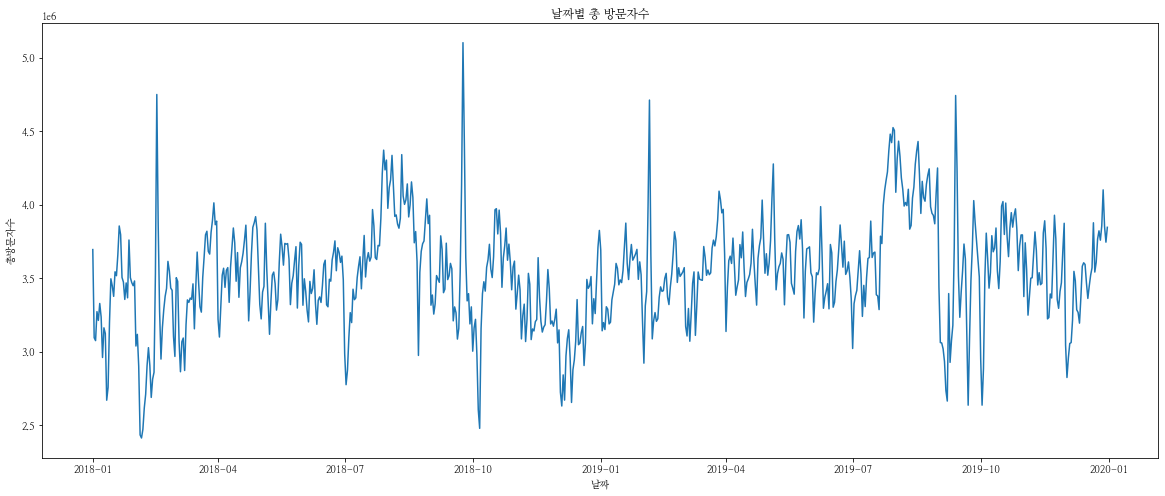

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(daily_tour['날짜'],daily_tour['총방문자수'])
plt.title('날짜별 총 방문자수')
plt.xlabel('날짜')
plt.ylabel('총방문자수')

In [ ]:
t = (df1.groupby("읍면동").count()).reset_index(level=['읍면동'])['읍면동'] # 16건
dong = []
for i in t:
  dong.append(i)

건입동
구좌읍
남원읍
노형동
대정읍
서홍동
성산읍
안덕면
애월읍
연동
용담1동
우도면
조천읍
표선면
한경면
한림읍


Text(0, 0.5, '총방문자수')

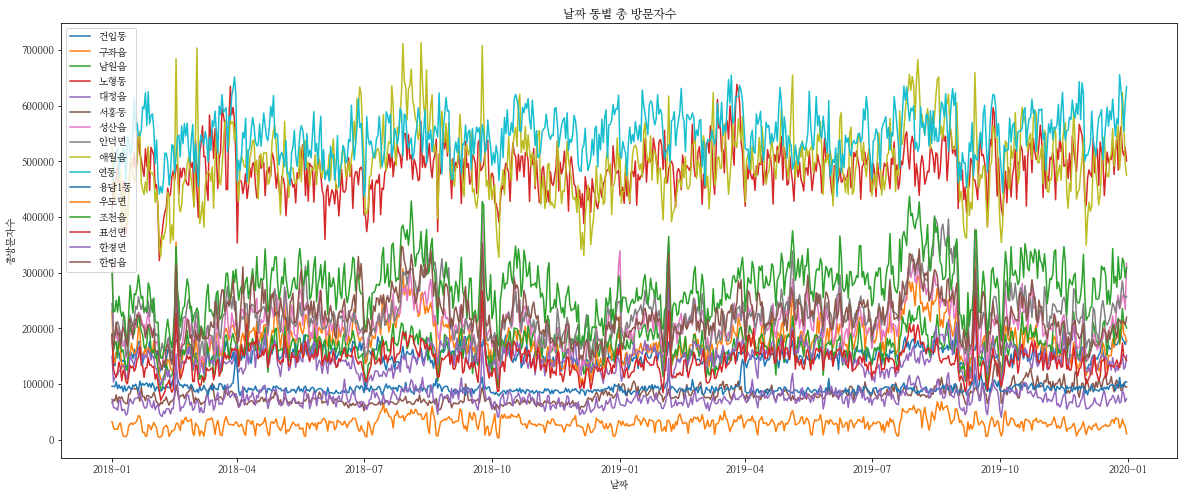

In [ ]:
plt.figure(figsize=(20,8))

for i in range(len(dong)):
  df = daily_dong_tour[daily_dong_tour['읍면동']==dong[i]]
  print(dong[i])
  plt.plot(df['날짜'], df['총방문자수'],label=dong[i])

plt.legend()
plt.title('날짜 동별 총 방문자수')
plt.xlabel('날짜')
plt.ylabel('총방문자수')

In [ ]:
dong

['건입동',
 '구좌읍',
 '남원읍',
 '노형동',
 '대정읍',
 '서홍동',
 '성산읍',
 '안덕면',
 '애월읍',
 '연동',
 '용담1동',
 '우도면',
 '조천읍',
 '표선면',
 '한경면',
 '한림읍']

In [ ]:
df3 = df1[df1['읍면동']==dong[0]]

features_cosidered=['관광기후지수','평균기온','일강수량','최대풍속','총방문자수']
features = df3[features_cosidered]
features.index = df3['날짜']
features

,관광기후지수,평균기온,일강수량,최대풍속,총방문자수
날짜,,,,,
2018-01-01,33.81,0.8,0.0,2.6,176759
2018-01-02,57.30,1.0,0.0,1.5,154567
2018-01-03,48.52,0.0,0.0,3.4,132826
2018-01-04,29.42,-1.1,1.0,2.1,157389
2018-01-05,21.54,-0.4,4.5,3.2,152996
...,...,...,...,...,...
2019-12-27,-0.53,0.7,0.5,4.2,190487
2019-12-28,-0.18,2.1,0.0,1.6,180995
2019-12-29,-0.78,7.7,22.5,2.3,176850


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7efbf9fa3750>,
      dtype=object)

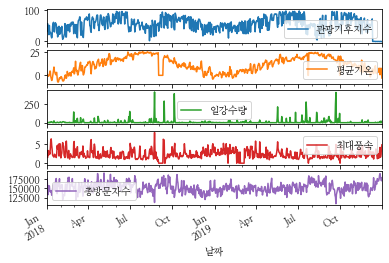

In [ ]:
features.plot(subplots=True)

In [ ]:
import tensorflow as tf
import numpy as np
import datetime

In [ ]:
def data_standardization(x):
    x_np = np.asarray(x)
    return (x_np - x_np.mean()) / x_np.std()

def min_max_scaling(x):
    x_np = np.asarray(x)
    return (x_np - x_np.min()) / (x_np.max() - x_np.min()+ 1e-7) # 1e-7은 0으로 나누는 오류 예방차원

def reverse_min_max_scaling(org_x, x):
    org_x_np = np.asarray(org_x)
    x_np = np.asarray(x)
    return (x_np * (org_x_np.max() - org_x_np.min()+1e-7)) + org_x_np.min()

In [ ]:
# 하이퍼파라미터
input_data_column_cnt = 4  # 입력데이터의 컬럼 개수(Variable 개수)
output_data_column_cnt = 1 # 결과데이터의 컬럼 개수
 
seq_length = 28            # 1개 시퀀스의 길이(시계열데이터 입력 개수)
rnn_cell_hidden_dim = 20   # 각 셀의 (hidden)출력 크기
forget_bias = 1.0          # 망각편향(기본값 1.0)
num_stacked_layers = 1     # stacked LSTM layers 개수
keep_prob = 1.0            # dropout할 때 keep할 비율
 
epoch_num = 1000           # 에폭 횟수(학습용전체데이터를 몇 회 반복해서 학습할 것인가 입력)
learning_rate = 0.01       # 학습률

In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 730 entries, 2018-01-01 to 2019-12-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   관광기후지수  730 non-null    float64
 1   평균기온    730 non-null    float64
 2   일강수량    730 non-null    float64
 3   최대풍속    730 non-null    float64
 4   총방문자수   730 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 34.2 KB


In [ ]:
features = features.astype(np.float) # 부동소수점으로 변환
features.info() 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 730 entries, 2018-01-01 to 2019-12-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   관광기후지수  730 non-null    float64
 1   평균기온    730 non-null    float64
 2   일강수량    730 non-null    float64
 3   최대풍속    730 non-null    float64
 4   총방문자수   730 non-null    float64
dtypes: float64(5)
memory usage: 34.2 KB


In [ ]:
norm_features = min_max_scaling(features) # min max 정규화

In [ ]:
norm_features.shape

(730, 5)

In [ ]:
x = norm_features
y = x[:,[-1]] # 타겟은 총방문자수

In [ ]:
dataX = []
dataY = []


In [ ]:
for i in range(0, len(y) - seq_length):
    _x = x[i : i+seq_length]
    _y = y[i + seq_length] # 다음 나타날 주가(정답)
    if i is 0:
        print(_x, "->", _y) # 첫번째 행만 출력해 봄
    dataX.append(_x) # dataX 리스트에 추가
    dataY.append(_y) # dataY 리스트에 추가

[[2.13878092e-04 4.21409036e-05 3.79788390e-05 5.15055488e-05
  9.19640939e-01]
 [3.36086712e-04 4.31814197e-05 3.79788390e-05 4.57827101e-05
  8.04185268e-01]
 [2.90408054e-04 3.79788390e-05 3.79788390e-05 5.56676134e-05
  6.91075961e-01]
 [1.91038763e-04 3.22560003e-05 4.31814197e-05 4.89042585e-05
  8.18866951e-01]
 [1.50042427e-04 3.58978067e-05 6.13904521e-05 5.46270972e-05
  7.96012014e-01]
 [3.05131357e-04 4.05801294e-05 3.79788390e-05 5.35865811e-05
  8.15474868e-01]
 [1.87709111e-04 6.13904521e-05 6.39917425e-05 5.04650327e-05
  7.36406047e-01]
 [1.88021266e-04 6.13904521e-05 7.69981942e-05 5.77486456e-05
  7.43736483e-01]
 [1.83130840e-04 3.17357422e-05 4.83840004e-05 6.91943232e-05
  7.30688411e-01]
 [1.25694349e-04 2.13305808e-05 8.22007749e-05 7.17956135e-05
  7.49063926e-01]
 [9.57274847e-05 9.36464524e-06 1.08213678e-04 6.29512263e-05
  6.86539311e-01]
 [1.20387717e-04 1.24861937e-05 7.17956135e-05 5.72283876e-05
  6.82346031e-01]
 [2.90408054e-04 3.01749680e-05 4.058012

In [ ]:
#학습용/테스트용 데이터 생성
# 전체 70%를 학습용 데이터로 사용
train_size = int(len(dataY) * 0.7)
# 나머지(30%)를 테스트용 데이터로 사용
test_size = len(dataY) - train_size
 
# 데이터를 잘라 학습용 데이터 생성
trainX = np.array(dataX[0:train_size])
trainY = np.array(dataY[0:train_size])
 
# 데이터를 잘라 테스트용 데이터 생성
testX = np.array(dataX[train_size:len(dataX)])
testY = np.array(dataY[train_size:len(dataY)])

In [ ]:
#!pip uninstall tensorflow
#!pip install tensorflow==1.15

In [ ]:
import tensorflow as tf

X = tf.placeholder(tf.float32, [None, seq_length, input_data_column_cnt])
print("X: ", X)
Y = tf.placeholder(tf.float32, [None, 1])
print("Y: ", Y)

X:  Tensor("Placeholder:0", shape=(?, 28, 4), dtype=float32)
Y:  Tensor("Placeholder_1:0", shape=(?, 1), dtype=float32)


In [ ]:
print(tf.__version__)

1.15.0


In [ ]:
# 검증용 측정지표를 산출하기 위한 targets, predictions를 생성한다
targets = tf.placeholder(tf.float32, [None, 1])
print("targets: ", targets)
 
predictions = tf.placeholder(tf.float32, [None, 1])
print("predictions: ", predictions)

targets:  Tensor("Placeholder_2:0", shape=(?, 1), dtype=float32)
predictions:  Tensor("Placeholder_3:0", shape=(?, 1), dtype=float32)


In [ ]:
#모델(LSTM 네트워크) 생성
def lstm_cell():
    # LSTM셀을 생성
    # num_units: 각 Cell 출력 크기
    # forget_bias:  to the biases of the forget gate 
    #              (default: 1)  in order to reduce the scale of forgetting in the beginning of the training.
    # state_is_tuple: True ==> accepted and returned states are 2-tuples of the c_state and m_state.
    # state_is_tuple: False ==> they are concatenated along the column axis.
  
    cell = tf.contrib.rnn.BasicLSTMCell(num_units=rnn_cell_hidden_dim, 
                                        forget_bias=forget_bias, state_is_tuple=True, activation=tf.nn.softsign)
    if keep_prob < 1.0:
        cell = tf.contrib.rnn.DropoutWrapper(cell, output_keep_prob=keep_prob)
    return cell

In [ ]:
# num_stacked_layers개의 층으로 쌓인 Stacked RNNs 생성
stackedRNNs = [lstm_cell() for _ in range(num_stacked_layers)]
multi_cells = tf.contrib.rnn.MultiRNNCell(stackedRNNs, state_is_tuple=True) if num_stacked_layers > 1 else lstm_cell()
 
# RNN Cell(여기서는 LSTM셀임)i들을 연결
hypothesis, _states = tf.nn.dynamic_rnn(multi_cells, X, dtype=tf.float32)
print("hypothesis: ", hypothesis)

ValueError: ignored

In [ ]:
hypothesis = tf.contrib.layers.fully_connected(hypothesis[:, -1], output_data_column_cnt, activation_fn=tf.identity)
  
# 손실함수로 평균제곱오차를 사용한다
loss = tf.reduce_sum(tf.square(hypothesis - Y))
# 최적화함수로 AdamOptimizer를 사용한다
optimizer = tf.train.AdamOptimizer(learning_rate)
# optimizer = tf.train.RMSPropOptimizer(learning_rate) # LSTM과 궁합 별로임
 
train = optimizer.minimize(loss)
 
# RMSE(Root Mean Square Error)
# 제곱오차의 평균을 구하고 다시 제곱근을 구하면 평균 오차가 나온다
# rmse = tf.sqrt(tf.reduce_mean(tf.square(targets-predictions))) # 아래 코드와 같다
rmse = tf.sqrt(tf.reduce_mean(tf.squared_difference(targets, predictions)))
 
 
train_error_summary = [] # 학습용 데이터의 오류를 중간 중간 기록한다
test_error_summary = []  # 테스트용 데이터의 오류를 중간 중간 기록한다
test_predict = ''        # 테스트용데이터로 예측한 결과
 
sess = tf.Session()
sess.run(tf.global_variables_initializer())

ValueError: ignored

In [ ]:
# 학습한다
start_time = datetime.datetime.now() # 시작시간을 기록한다
print('학습을 시작합니다...')
for epoch in range(epoch_num):
    _, _loss = sess.run([train, loss], feed_dict={X: trainX, Y: trainY})
    if ((epoch+1) % 100 == 0) or (epoch == epoch_num-1): # 100번째마다 또는 마지막 epoch인 경우
        # 학습용데이터로 rmse오차를 구한다
        train_predict = sess.run(hypothesis, feed_dict={X: trainX})
        train_error = sess.run(rmse, feed_dict={targets: trainY, predictions: train_predict})
        train_error_summary.append(train_error)
 
        # 테스트용데이터로 rmse오차를 구한다
        test_predict = sess.run(hypothesis, feed_dict={X: testX})
        test_error = sess.run(rmse, feed_dict={targets: testY, predictions: test_predict})
        test_error_summary.append(test_error)
        
        # 현재 오류를 출력한다
        print("epoch: {}, train_error(A): {}, test_error(B): {}, B-A: {}".format(epoch+1, train_error, test_error, test_error-train_error))
        
end_time = datetime.datetime.now() # 종료시간을 기록한다
elapsed_time = end_time - start_time # 경과시간을 구한다
print('elapsed_time:',elapsed_time)
print('elapsed_time per epoch:',elapsed_time/epoch_num)
 
 
# 하이퍼파라미터 출력
print('input_data_column_cnt:', input_data_column_cnt, end='')
print(',output_data_column_cnt:', output_data_column_cnt, end='')
 
print(',seq_length:', seq_length, end='')
print(',rnn_cell_hidden_dim:', rnn_cell_hidden_dim, end='')
print(',forget_bias:', forget_bias, end='')
print(',num_stacked_layers:', num_stacked_layers, end='')
print(',keep_prob:', keep_prob, end='')
 
print(',epoch_num:', epoch_num, end='')
print(',learning_rate:', learning_rate, end='')
 
print(',train_error:', train_error_summary[-1], end='')
print(',test_error:', test_error_summary[-1], end='')
print(',min_test_error:', np.min(test_error_summary))
 

학습을 시작합니다...


ValueError: ignored

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


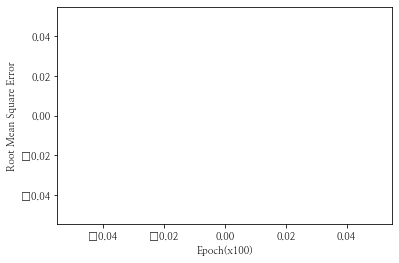

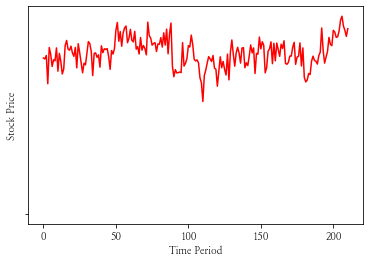

In [ ]:
# 결과 그래프 출력
plt.figure(1)
plt.plot(train_error_summary, 'gold')
plt.plot(test_error_summary, 'b')
plt.xlabel('Epoch(x100)')
plt.ylabel('Root Mean Square Error')
 
plt.figure(2)
plt.plot(testY, 'r')
plt.plot(test_predict, 'b')
plt.xlabel('Time Period')
plt.ylabel('Stock Price')
plt.show()

In [ ]:
# sequence length만큼의 가장 최근 데이터를 슬라이싱한다
recent_data = np.array([x[len(x)-seq_length : ]])
print("recent_data.shape:", recent_data.shape)
print("recent_data:", recent_data)
 

test_predict = sess.run(hypothesis, feed_dict={X: recent_data})
 
print("test_predict", test_predict[0])
test_predict = reverse_min_max_scaling(price,test_predict) # 금액데이터 역정규화한다
print("Tomorrow's stock price", test_predict[0]) # 예측한 주가를 출력한다

recent_data.shape: (1, 28, 5)
recent_data: [[[3.26774093e-04 6.34714844e-05 3.79788390e-05 4.94245165e-05
   7.03822284e-01]
  [3.12050790e-04 5.15055488e-05 3.79788390e-05 5.35865811e-05
   6.98593690e-01]
  [2.82396080e-04 2.91344519e-05 3.79788390e-05 5.25460650e-05
   7.65743399e-01]
  [3.12050790e-04 4.47421939e-05 3.79788390e-05 5.41068392e-05
   7.90814636e-01]
  [3.20062764e-04 5.25460650e-05 3.79788390e-05 4.99447746e-05
   7.68927379e-01]
  [3.65741422e-04 5.77486456e-05 3.79788390e-05 4.73434843e-05
   7.65608132e-01]
  [4.15374042e-04 7.28361296e-05 3.79788390e-05 4.63029681e-05
   7.51108540e-01]
  [3.62099616e-05 7.33563877e-05 3.79788390e-05 5.35865811e-05
   7.93608422e-01]
  [3.64180648e-05 4.78637423e-05 3.79788390e-05 5.35865811e-05
   8.10839369e-01]
  [3.60538842e-05 4.73434843e-05 3.79788390e-05 4.37016778e-05
   9.32153145e-01]
  [3.63140132e-05 6.03499360e-05 3.79788390e-05 5.04650327e-05
   8.18762899e-01]
  [3.71464261e-05 7.49171619e-05 3.79788390e-05 4.99447

ValueError: ignored

In [ ]:
TRAIN_SPLIT = 400
dataset = features.values
dataset

array([[ 3.38100e+01,  6.90000e+00,  0.00000e+00,  5.20000e+00,
         2.31530e+05],
       [ 5.73000e+01,  7.50000e+00,  0.00000e+00,  3.10000e+00,
         1.44289e+05],
       [ 4.85200e+01,  5.00000e+00,  0.00000e+00,  6.90000e+00,
         1.38402e+05],
       ...,
       [-7.80000e-01,  1.19000e+01,  2.40000e+01,  3.70000e+00,
         1.90245e+05],
       [-4.00000e-01,  1.22000e+01,  0.00000e+00,  7.50000e+00,
         1.87253e+05],
       [-9.40000e-01,  3.40000e+00,  0.00000e+00,  1.17000e+01,
         1.75811e+05]])

In [ ]:
data_mean = dataset[:TRAIN_SPLIT].mean(axis=0)
data_std = dataset[:TRAIN_SPLIT].std(axis=0)
# 표준화
dataset = (dataset-data_mean)/data_std
dataset

array([[-1.02357416, -1.10477082, -0.24782623,  0.13823123,  1.42087949],
       [ 0.12201445, -1.03155466, -0.24782623, -0.74208894, -0.83648681],
       [-0.30617916, -1.33662199, -0.24782623,  0.85087136, -0.98881331],
       ...,
       [-2.71050093, -0.49463617,  0.72802768, -0.49056889,  0.35262755],
       [-2.69196863, -0.45802809, -0.24782623,  1.1023914 ,  0.27520936],
       [-2.718304  , -1.53186508, -0.24782623,  2.86303173, -0.0208531 ]])

In [ ]:
# 데이터 프레임으로 변환 작업 아래와 같은 형식으로
# https://m.blog.naver.com/wideeyed/221160038616
# https://www.tensorflow.org/tutorials/structured_data/time_series?hl=ko
# https://ahnjg.tistory.com/33
# 동별로 반복
# 1) 컬럼들을 minmax 정규화한다
# 2) lstm 모델에다 집어 넣고 예측
# 3) plot() 그려서 모델 평가 및 검증
# 4) 예측된 결과를 역정규화 해서
#     2020-01-01 의 총방문자수 데이터 가져오기
# 5) 데이터 프레임에 추가
#              일자        읍면동    총방문자수
#  ex) 2020-01-01  애월동     1000

In [3]:
predict = df1[df1['날짜']== '2018-01-01'].sort_values(by="총방문자수")[:5]
predict

NameError: ignored

In [2]:
# 관광지 리스트 가져오기
df2 = pd.read_csv("/content/drive/MyDrive/tensorflow 3조/data/targetData/jejuTourlist.csv")
df2 = df2.iloc[:,1:]
df2

NameError: ignored

In [ ]:
# 필요한 컬럼만 자르기
df2 = df2[['관광명소','분류', '분류2', '읍면동','위도','경도','월','화','수','목','금','토','일']]
df2

,관광명소,분류,분류2,읍면동,위도,경도,월,화,수,목,금,토,일
0,넥슨컴퓨터박물관,박물관,실내,노형동,33.471803,126.484899,휴무,10:00 - 18:00,10:00 - 18:00,10:00 - 18:00,10:00 - 18:00,10:00 - 18:00,10:00 - 18:00
1,이룸갤러리,미술관,실내,연동,33.494022,126.482798,10:00 - 21:00,10:00 - 21:00,10:00 - 21:00,10:00 - 21:00,10:00 - 21:00,10:00 - 21:00,14:00 - 21:00
2,오설록 티 뮤지엄,박물관,실내,안덕면,33.306090,126.289566,09:00 - 18:00,09:00 - 18:00,09:00 - 18:00,09:00 - 18:00,09:00 - 18:00,09:00 - 18:00,09:00 - 18:00
3,제주항공우주박물관,박물관,실내,안덕면,33.304541,126.299772,09:00 - 18:00,09:00 - 18:00,09:00 - 18:00,09:00 - 18:00,09:00 - 18:00,09:00 - 18:00,09:00 - 18:00
4,아르떼뮤지엄 제주,미술관,실내,애월읍,33.397511,126.345700,10:00 - 20:00,10:00 - 20:00,10:00 - 20:00,10:00 - 20:00,10:00 - 20:00,10:00 - 20:00,10:00 - 20:00
5,본태박물관,박물관,실내,안덕면,33.303924,126.392515,10:00 - 18:00,10:00 - 18:00,10:00 - 18:00,10:00 - 18:00,10:00 - 18:00,10:00 - 18:00,10:00 - 18:00
6,새별오름,오름,실외,애월읍,33.366767,126.356397,00:00 - 24:00,00:00 - 24:00,00:00 - 24:00,00:00 - 24:00,00:00 - 24:00,00:00 - 24:00,00:00 - 24:00
7,세계자동차&피아노 박물관,박물관,실내,안덕면,33.283410,126.349793,09:00 - 17:30,09:00 - 17:30,09:00 - 17:30,09:00 - 17:30,09:00 - 17:30,09:00 - 17:30,09:00 - 17:30
8,숨도,박물관,실외,호근동,33.250635,126.536648,08:00 - 18:00,08:00 - 18:00,08:00 - 18:00,08:00 - 18:00,08:00 - 18:00,08:00 - 18:00,08:00 - 18:00
9,건강과 성 박물관,박물관,실내,안덕면,33.254902,126.346939,09:00 - 18:00,09:00 - 18:00,09:00 - 18:00,09:00 - 18:00,09:00 - 18:00,09:00 - 18:00,09:00 - 18:00


In [ ]:
a = predict['읍면동'].tolist()
a
b = predict['일강수량'].tolist()
b
c = predict['평균기온'].tolist()
c

[8.0, 6.9, 7.2, 3.8, 9.3]

In [ ]:
p_arr = []
for i in range(len(a)):
  p_arr.append((a[i],b[i],c[i]))

In [1]:
cnt = len(p_arr) # 5개
recom_list = []
day = predict['요일'].tolist()[0]
days = ['월','화','수','목','금','토','일']

# 해당 요일에 휴무인 곳 제외
temp1 = df2[df2[days[day]]!='휴무']
temp1

NameError: ignored

In [ ]:
for i in range(len(p_arr)):
  if p_arr[i][1] >= 50.0 or p_arr[i][2] >= 10.0: #일강수량, 풍속에 따라 실내 관광지 추천
    temp1 = temp1[temp1['분류2']=='실내']
  temp2 = temp1[temp1['읍면동']==p_arr[i][0]][:1]
  recom_list.append(temp2['관광명소'].tolist()[0])

In [ ]:
recom_list

['우도올레보트', '제주현대미술관', '새연교', '제주향교', '초콜릿박물관']

In [ ]:
import folium
colors = ['red', 'orange', 'blue', 'green', 'pink']
map = folium.Map(location = [33.461058,126.570421], zoom_start =11)

for i in range(len(recom_list)):
  temp = df2[df2['관광명소']==recom_list[i]]
  latitude =  round(temp['위도'].tolist()[0],6)
  longtitude = round(temp['경도'].tolist()[0],6)
  toursite = temp['관광명소'].tolist()[0]
  v_color = colors[i]
  folium.Marker([latitude,longtitude], popup = toursite, tooltip=toursite, icon =folium.Icon(icon = 'car', prefix='fa', color = v_color)).add_to(map)

In [ ]:
map